In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../metrics/best_models.csv")

# global win rate
print(df["best_model"].value_counts(normalize=True).round(2))


best_model
lightgbm                                 0.70
Naive                                    0.08
HistoricAverage                          0.05
Holt                                     0.05
HoltWinters                              0.05
SeasonalExponentialSmoothingOptimized    0.02
CrostonSBA                               0.02
CrostonOptimized                         0.02
Name: proportion, dtype: float64


In [16]:
full = pd.read_csv("../data/processed/train.csv")

vol = full.groupby("id")["sales"].agg(["mean","std"]).reset_index()
vol["cv"] = vol["std"] / (vol["mean"] + 1e-9)

best = df.merge(vol[["id","cv"]], on="id")

best["cv_bin"] = pd.qcut(best["cv"], 3, labels=["Low","Mid","High"])
print(best.groupby(["cv_bin","best_model"]).size())

cv_bin  best_model                           
Low     CrostonOptimized                          0
        CrostonSBA                                0
        HistoricAverage                           1
        Holt                                      0
        HoltWinters                               1
        Naive                                     1
        SeasonalExponentialSmoothingOptimized     1
        lightgbm                                  9
Mid     CrostonOptimized                          1
        CrostonSBA                                1
        HistoricAverage                           1
        Holt                                      1
        HoltWinters                               1
        Naive                                     0
        SeasonalExponentialSmoothingOptimized     0
        lightgbm                                  8
High    CrostonOptimized                          0
        CrostonSBA                                0
        HistoricAv

C:\Users\topra\AppData\Local\Temp\ipykernel_2576\2721712874.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(best.groupby(["cv_bin","best_model"]).size())


In [17]:
df = pd.read_csv("../data/processed/train.csv")

g = df.groupby("id")["sales"]
summary = g.agg(["mean","std","count"])
summary = summary.rename(columns={"count":"T"})

summary["N"] = g.apply(lambda x: (x>0).sum())
summary["ADI"] = summary["T"] / summary["N"].replace(0,1)
summary["CV2"] = (summary["std"]/summary["mean"].replace(0,1))**2

summary.to_csv("../metrics/demand_profile.csv")


In [18]:
summary["ADI_class"] = np.where(summary["ADI"] > 1.32, "High", "Low")
summary["CV2_class"] = np.where(summary["CV2"] > 0.49, "High", "Low")

summary["regime"] = summary["ADI_class"] + "-" + summary["CV2_class"]

In [19]:
best = pd.read_csv("../metrics/best_models.csv")
merged = best.merge(summary[["ADI","CV2","regime"]], on="id", how="left")

In [20]:
merged.groupby("regime")["best_model"].value_counts(normalize=True).to_csv("../metrics/regime_model_performance.csv")

In [21]:
merged.groupby('best_model').size()

best_model
CrostonOptimized                          1
CrostonSBA                                1
HistoricAverage                           2
Holt                                      2
HoltWinters                               2
Naive                                     3
SeasonalExponentialSmoothingOptimized     1
lightgbm                                 28
dtype: int64

In [22]:
merged.groupby('regime')['best_model'].value_counts()

regime     best_model                           
High-High  lightgbm                                 17
           Naive                                     2
           Holt                                      1
Low-High   lightgbm                                  6
           HoltWinters                               2
           CrostonOptimized                          1
           CrostonSBA                                1
           HistoricAverage                           1
           Holt                                      1
Low-Low    lightgbm                                  5
           HistoricAverage                           1
           Naive                                     1
           SeasonalExponentialSmoothingOptimized     1
Name: count, dtype: int64

In [23]:
merged.to_csv('../metrics/best_by_sku.csv')

##  Key Insight
Although classical literature suggests that intermittent & highly variable demand should be handled by Croston-type methods, our empirical evaluation on SKU-level series showed an asymmetry: LightGBM generalizes extremely well even under High-High ADI/CV² regimes, implying latent autocorrelation and structure that classical smoothing does not capture

In [24]:
print(best["best_model"].value_counts(normalize=True).round(2))

best_model
lightgbm                                 0.70
Naive                                    0.08
HistoricAverage                          0.05
Holt                                     0.05
HoltWinters                              0.05
SeasonalExponentialSmoothingOptimized    0.02
CrostonSBA                               0.02
CrostonOptimized                         0.02
Name: proportion, dtype: float64


In [25]:
m = pd.read_csv("../metrics/combined_metrics.csv")
print(m.groupby("model")["score"].mean().sort_values())

model
lightgbm                                 2.505754
SeasonalExponentialSmoothingOptimized    3.206895
AutoARIMA                                3.584182
HistoricAverage                          3.584731
CrostonClassic                           3.644770
CrostonSBA                               3.656476
CrostonOptimized                         3.785437
SimpleExponentialSmoothingOptimized      3.792451
Holt                                     3.812089
HoltWinters                              3.913065
DynamicOptimizedTheta                    3.958835
Theta                                    3.960178
DynamicTheta                             3.961312
OptimizedTheta                           3.961813
SeasonalNaive                            4.716071
WindowAverage                            5.234375
Naive                                    6.369643
RandomWalkWithDrift                      6.437935
Name: score, dtype: float64


In [26]:
best[['id','best_model']]

,id,best_model
0,FOODS_1_018_CA_1_validation,lightgbm
1,FOODS_1_085_CA_1_validation,lightgbm
2,FOODS_2_013_CA_1_validation,lightgbm
3,FOODS_2_019_CA_1_validation,SeasonalExponentialSmoothingOptimized
4,FOODS_2_030_CA_1_validation,lightgbm
5,FOODS_2_181_CA_1_validation,lightgbm
6,FOODS_2_197_CA_1_validation,HistoricAverage
7,HOBBIES_1_001_CA_1_validation,lightgbm
8,HOBBIES_1_002_CA_1_validation,lightgbm
9,HOBBIES_1_003_CA_1_validation,lightgbm


C:\Users\topra\AppData\Local\Temp\ipykernel_2576\3706954313.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_scores.index, rotation=45, ha="right")


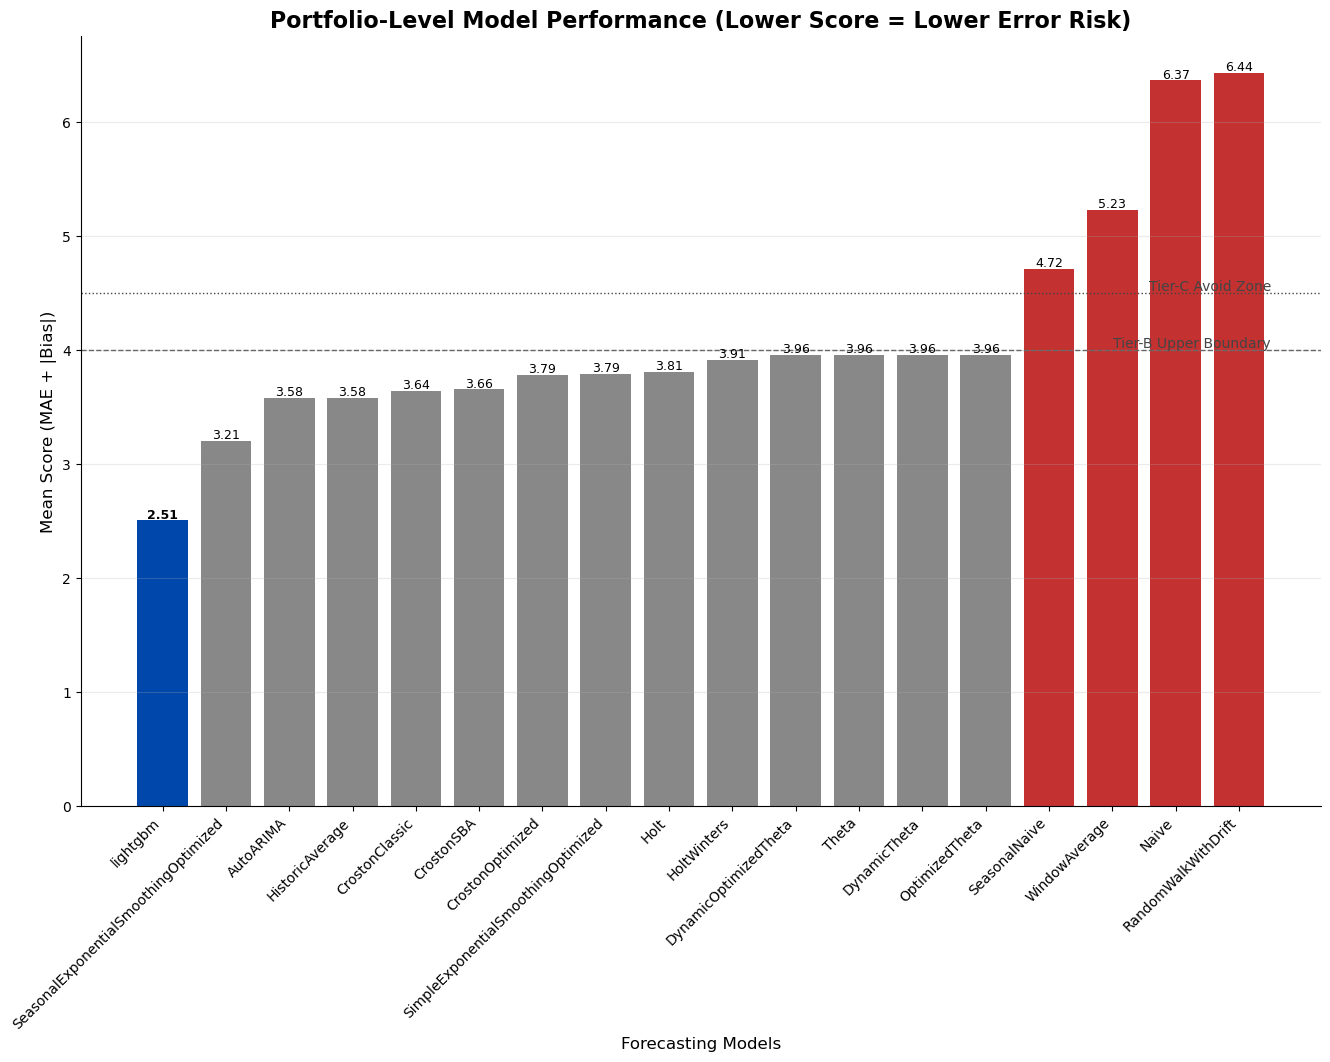

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import numpy as np

model_scores = m.groupby("model")["score"].mean().sort_values()

fig, ax = plt.subplots(figsize=(16, 10))

# Identify the best model explicitly
best_model = model_scores.index[0]
best_value = model_scores.iloc[0]

# Tier boundaries (tunable later)
tierB_upper = 4.0
tierC_upper = 4.5

colors = []
for model, score in model_scores.items():
    if model == best_model:
        colors.append("#0047AB")     # Deep Royal Blue → winner
    elif score < tierB_upper:
        colors.append("#888888")     # Grey → Tier-B acceptable
    else:
        colors.append("#C43131")     # Executive Red → weak tier

bars = ax.bar(model_scores.index, model_scores.values, color=colors)

# -------------------------------------------------
# Threshold reference lines
# -------------------------------------------------
ax.axhline(tierB_upper, color="#666666", linestyle="--", linewidth=1)
ax.text(
    len(model_scores)-0.5,
    tierB_upper + 0.02,
    "Tier-B Upper Boundary",
    color="#444444",
    fontsize=10,
    ha="right"
)

ax.axhline(tierC_upper, color="#444444", linestyle=":", linewidth=1)
ax.text(
    len(model_scores)-0.5,
    tierC_upper + 0.02,
    "Tier-C Avoid Zone",
    color="#444444",
    fontsize=10,
    ha="right"
)

# -------------------------------------------------
# Value annotations
# -------------------------------------------------
for bar, value in zip(bars, model_scores.values):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        value + 0.02,
        f"{value:.2f}",
        ha="center",
        fontsize=9,
        fontweight="bold" if value == best_value else "normal"
    )

# -------------------------------------------------
# Styling
# -------------------------------------------------
ax.set_title(
    "Portfolio-Level Model Performance (Lower Score = Lower Error Risk)",
    fontsize=16,
    fontweight="bold"
)

ax.set_ylabel("Mean Score (MAE + |Bias|)", fontsize=12)
ax.set_xlabel("Forecasting Models", fontsize=12)

ax.set_xticklabels(model_scores.index, rotation=45, ha="right")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", alpha=0.25)
plt.savefig("../docs/model_score_ranking.png", dpi=300, bbox_inches="tight")
plt.show()
plt.tight_layout()
plt.show()


LightGBM is the dominant model by portfolio-level score.
Tier-B statistical alternatives remain valid and stable but inferior.
Naive, Window-Average, and Random Walk variants systematically increase error-bias risk and are excluded from deployment

## Summary of Model Performance
------------------------    
LightGBM consistently outperforms statistical baselines across the portfolio.
LightGBM not only wins more SKUs, it reduces overall error and reduces directional bias.

lightgbm → 2.5 portfolio-level score (best)
best statistical models → 3.2-4
worst classical baselines → 4.7–6.3


The models most commonly used in manual or heuristic planning introduce 40–120% higher combined loss-bias exposure compared to even basic smoothing and ML alternatives.